### Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [ ]:
#Soln

In [1]:
# step 1  importing all neccessary libraries
import pandas as pd
import random

In [2]:
# step 2 creating 3 different series
firstseries = []
secondseries = []
thirdseries = []

for i in range(100):
    firstnumber = random.randint(1, 4)
    secondnumber = random.randint(1, 3)
    thirdnumber = random.randint(10000, 30000)
    
    # add the number to. the list each time
    firstseries.append(firstnumber)
    secondseries.append(secondnumber)
    thirdseries.append(thirdnumber)

In [3]:
# Printing the length of the series
print(len(firstseries))
print(len(secondseries))
print(len(thirdseries))

100
100
100


In [7]:
# step 3
zipped_series = zip(firstseries, secondseries, thirdseries)
df = pd.DataFrame(list(zipped_series))

df

,0,1,2
0,4,3,28305
1,3,3,27478
2,3,2,17720
3,4,1,29312
4,3,2,28936
...,...,...,...
95,2,3,17845
96,4,3,21553
97,4,2,26452
98,3,1,13818


In [8]:
# step 4 changing name of the column to bedrs, bathrs, price_sqr_meter
df.rename(columns={0: "bedrs", 1: "bathrs", 2:"price_sqr_meter"}, inplace=True)

In [9]:
df

,bedrs,bathrs,price_sqr_meter
0,4,3,28305
1,3,3,27478
2,3,2,17720
3,4,1,29312
4,3,2,28936
...,...,...,...
95,2,3,17845
96,4,3,21553
97,4,2,26452
98,3,1,13818


In [10]:
#step 6 resizing the dataframe so it can show all 
df = df.reindex(list(range(300)))

In [11]:
# step 7 
df["bigcolumn"] = firstseries + secondseries + thirdseries

In [12]:
df

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,4.0,3.0,28305.0,4
1,3.0,3.0,27478.0,3
2,3.0,2.0,17720.0,3
3,4.0,1.0,29312.0,4
4,3.0,2.0,28936.0,3
...,...,...,...,...
295,NaN,NaN,NaN,17845
296,NaN,NaN,NaN,21553
297,NaN,NaN,NaN,26452
298,NaN,NaN,NaN,13818


## Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [13]:
# Soln

In [212]:
# importing libraries
import datetime
import pandas as pd
import numpy as np

In [213]:
# step 2 importing my dataset
windstats_data_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
windstats_df = pd.read_csv(windstats_data_path, sep="\s+")

In [214]:
windstats_df.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [216]:
# this function adds the Yr, Mo, Dy together
def to_datetime(year, month, day):
    res = f"19{int(year)}-{int(month)}-{int(day)}"
    return res

In [218]:
#  Or step 5(ii)
windstats_df["date_time"] = pd.to_datetime(windstats_df["date_time"], infer_datetime_format=True)

windstats_df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_time
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [219]:
# step 5
print(windstats_df["date_time"].dtypes)
windstats_df.set_index('date_time', inplace=True)
#Ref
#https://www.reddit.com/r/learnpython/comments/f1fpd4/what_is_the_real_difference_between_dtypem8ns_and/

datetime64[ns]


In [220]:
windstats_df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [221]:
# step 6 computing missing values
missing_values = windstats_df.isnull().sum()
missing_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [222]:
# Computting non missing valeus
non_missing_values = windstats_df.notnull().sum().sum()
non_missing_values

78857

In [223]:
# dropping all the NA's
windstats_df.dropna(inplace=True)

In [224]:
missing_values = windstats_df.isnull().sum()
missing_values

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [225]:
# step 8 calculating the mean spead
windstats_df.mean().mean()

10.222465245951712

In [226]:
# step 9
loc_stats = windstats_df.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000,10.710000
50%,11.710000,10.130000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.250000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.380000,13.540000,9.670000,12.960000,11.420000,11.170000,11.580000,16.880000,19.860000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [227]:
# step 10 
day_stats = windstats_df.apply(pd.Series.describe, axis=1)
day_stats.head()


,count,mean,std,min,25%,50%,75%,max
date_time,,,,,,,,
1961-01-04,12.0,6.619167,3.198126,1.79,4.5700,5.855,9.1175,11.75
1961-01-05,12.0,10.630000,2.445356,6.17,9.8075,11.170,12.1700,13.33
1961-01-06,12.0,8.240000,2.998063,4.42,6.3450,7.810,10.1375,13.21
1961-01-07,12.0,10.385000,3.072114,4.96,8.2375,9.395,13.5725,14.29
1961-01-08,12.0,10.487500,3.547237,5.91,7.6200,9.685,11.7925,16.62


In [228]:
# step 11 Avg windspeed in January for each location
january_mean = windstats_df.loc[windstats_df.index.month==1, :].mean()
january_mean

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [229]:
# step 12 Downsampling the record to a yearly frequency for each location
yearly_frequency = windstats_df.resample('Y').sum()
yearly_frequency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-12-31,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962-12-31,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [73]:
# step 13 Downsampling the record to a monthly frequency for each location
monthly_frequency = windstats_df.resample('M').sum()
monthly_frequency.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-31,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36


In [230]:
# step 14 Downsampling the record to a weekly frequency for each location
weekly_frequency = windstats_df.resample('W').sum()
weekly_frequency.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-08,61.58,52.04,50.25,28.29,42.53,31.21,54.68,29.66,40.75,42.14,57.08,66.13
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,72.60,57.00,70.09,25.76,53.80,41.63,46.97,43.75,35.35,40.16,59.96,62.08
1961-01-29,119.28,89.08,105.29,71.50,97.95,84.10,86.70,85.87,79.90,89.53,118.80,134.33
1961-02-05,117.79,108.22,88.33,57.73,93.53,63.75,85.43,59.84,68.75,66.22,98.09,83.55


### Question 5
Question 5 Python
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [76]:
#Soln
data_source = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(data_source, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [77]:
# step 5 What is the of observations in the datasets and number of columns in the dataset?
num_observations = chipo.shape[0]
num_columns = chipo.shape[1]
print(f"num_observations:{num_observations}, num_columns:{num_columns}")

num_observations:4622, num_columns:5


In [85]:
# step 7 Printing the name of all the columns
print(chipo.columns.values)

['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


In [96]:
# step 8 - it is indexed corresponding to the order id
# step 9 which was the most ordered item?
order_quantity = chipo.groupby(['item_name'])[['item_name','quantity']].sum()
order_quantity

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [97]:
# step 10
most_ordered = order_quantity[order_quantity.quantity == order_quantity.quantity.max()]
most_ordered

,quantity
item_name,
Chicken Bowl,761


In [90]:
# step 11 What was the most ordered item in the choice_description column?

In [98]:
order_quantity2 = chipo.groupby(['choice_description'])[['choice_description','quantity']].sum()
order_quantity2

,quantity
choice_description,
"[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",1
"[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]",1
[Adobo-Marinated and Grilled Chicken],1
"[Adobo-Marinated and Grilled Steak, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",1
[Adobo-Marinated and Grilled Steak],1
...,...
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Cheese, Lettuce]]",2
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Lettuce]]",1
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Pinto Beans, Cheese, Lettuce]]",1


In [99]:
most_ordered = order_quantity2[order_quantity2.quantity == order_quantity2.quantity.max()]
most_ordered

,quantity
choice_description,
[Diet Coke],159


In [100]:
# step 12 How many items were orderd in total?
order_quantity['quantity'].sum()

4972

In [102]:
#Step 13 Turn the item price into a float
def turn_to_float(dollar_value):
    price = dollar_value[1:]
    price_float = float(price)
    return price_float

res = turn_to_float("$2.50")
res

2.5

In [103]:
# step 13 Check the item price type
print(chipo['item_price'].dtypes)

object


In [104]:
#Create a lambda function and change the type of item price
chipo['item_price'] = chipo.apply(lambda x: 
                                  turn_to_float(x['item_price']), axis=1)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [105]:
#Check the item price type
print(chipo['item_price'].dtypes)

float64


In [106]:
#Step 14. How much was the revenue for the period in the dataset?
Revenue = (chipo['quantity']*chipo['item_price']).sum()
Revenue

39237.02

In [107]:
# step 15 How many orders were made in the period?
num_of_orders = chipo['quantity'].sum()
num_of_orders

4972

In [108]:
# step 16 What is the average revenue amount per order?
avg_Rev_amt_per_ord = round(Revenue/num_of_orders, 2)
avg_Rev_amt_per_ord

7.89

In [109]:
# step 17 How many different items are sold?
chipo['item_name'].nunique()

50

In [111]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

### Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.

In [110]:
#Soln

In [130]:
file_source = "us-marriages-divorces-1867-2014.csv"
us_marriages_df = pd.read_csv(file_source)

us_marriages_df.set_index('Year', inplace=True)

Text(0, 0.5, 'Divorce and Marriage per capita')

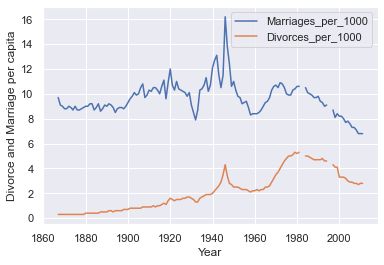

In [125]:
us_marriages_df[["Marriages_per_1000", "Divorces_per_1000"]].plot(kind='line')
# Set the y axis label of the current axis.
plt.ylabel('Divorce and Marriage per capita')

### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.

In [133]:
barchart_df = us_marriages_df[us_marriages_df.index.isin([1900, 1950,2000])]
barchart_df

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1900,709000.0,56000.0,76094000,9.3,0.7
1950,1667000.0,385000.0,151684000,11.0,2.5
2000,2315000.0,944000.0,282398000,8.2,3.3


Text(0, 0.5, 'Divorce and Marriage per capita')

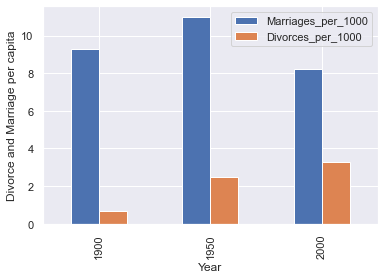

In [136]:
barchart_df[["Marriages_per_1000", "Divorces_per_1000"]].plot(kind='bar')
plt.ylabel('Divorce and Marriage per capita')

### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.

In [157]:
file_source = "actor_kill_counts.csv"
kill_counts_df = pd.read_csv(file_source)
kill_counts_df

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [158]:
%matplotlib inline

In [159]:
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats, integrate
np.random.seed(sum(map(ord, "distribution")))
np.random.seed(sum(map(ord, "regression")))

Text(0, 0.5, 'Actor')

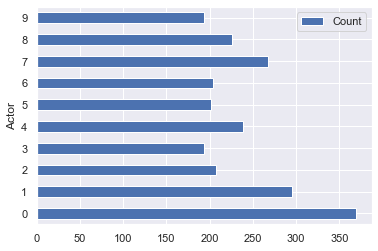

In [160]:
kill_counts_df.plot(kind='barh')
kill_counts_df.set_index('Count', inplace=True)
plt.ylabel('Actor')

### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [161]:
#soln

In [174]:
file_source = "roman-emperor-reigns.csv"
roman_emp_df = pd.read_csv(file_source)
roman_emp_df


,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


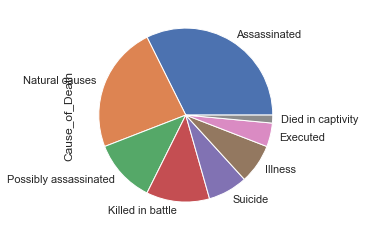

In [175]:
values_count = roman_emp_df["Cause_of_Death"].value_counts()
values_count.plot(kind='pie')

In [188]:
print(roman_emp_df.head())

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Color each dot according to its year.

In [193]:
#Soln

In [196]:
import pandas as pd 
file_source = "arcade-revenue-vs-cs-doctorates.csv"
arcade_revenue_df = pd.read_csv(file_source)

In [197]:
arcade_revenue_df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


C:\Users\tobal\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:218: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


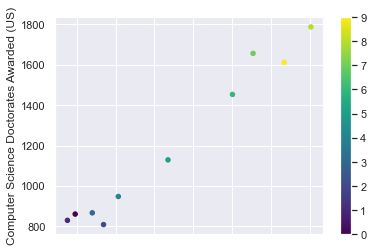

In [199]:
arcade_revenue_df.plot(kind="scatter",x="Total Arcade Revenue (billions)", y = "Computer Science Doctorates Awarded (US)", color=arcade_revenue_df.index, colormap='viridis')